In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas_profiling

In [13]:
%matplotlib inline

In [14]:
diamonds= pd.read_csv('./data/diamonds_train.csv')

In [15]:
diamonds.head()

carat        cut color clarity  depth  table  price     x     y     z
0   1.21    Premium     J     VS2   62.4   58.0   4268  6.83  6.79  4.25
1   0.32  Very Good     H     VS2   63.0   57.0    505  4.35  4.38  2.75
2   0.71       Fair     G     VS1   65.5   55.0   2686  5.62  5.53  3.65
3   0.41       Good     D     SI1   63.8   56.0    738  4.68  4.72  3.00
4   1.02      Ideal     G     SI1   60.5   59.0   4882  6.55  6.51  3.95

In [16]:
diamonds.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [17]:
diamonds.describe()


carat         depth         table         price             x  \
count  40455.000000  40455.000000  40455.000000  40455.000000  40455.000000   
mean       0.797706     61.752841     57.446133   3928.444469      5.729392   
std        0.475544      1.431725      2.233535   3992.416147      1.124453   
min        0.200000     43.000000     43.000000    326.000000      0.000000   
25%        0.400000     61.000000     56.000000    945.000000      4.710000   
50%        0.700000     61.800000     57.000000   2397.000000      5.690000   
75%        1.040000     62.500000     59.000000   5331.000000      6.540000   
max        4.500000     79.000000     95.000000  18823.000000     10.230000   

                  y             z  
count  40455.000000  40455.000000  
mean       5.732819      3.537154  
std        1.146650      0.697062  
min        0.000000      0.000000  
25%        4.720000      2.910000  
50%        5.710000      3.520000  
75%        6.540000      4.035000  
max       58.900000      8.060000

In [18]:
pandas_profiling.ProfileReport(diamonds)

Summarize dataset:   0%|          | 0/23 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Numerical variables

/Users/gonzaloalvarez/miniconda3/envs/ironhack_env/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


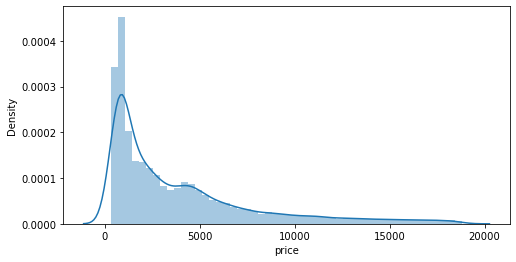

In [52]:
fig, ax = plt.subplots(figsize=(8,4))
ax= sns.distplot(diamonds['price'])
plt.show()

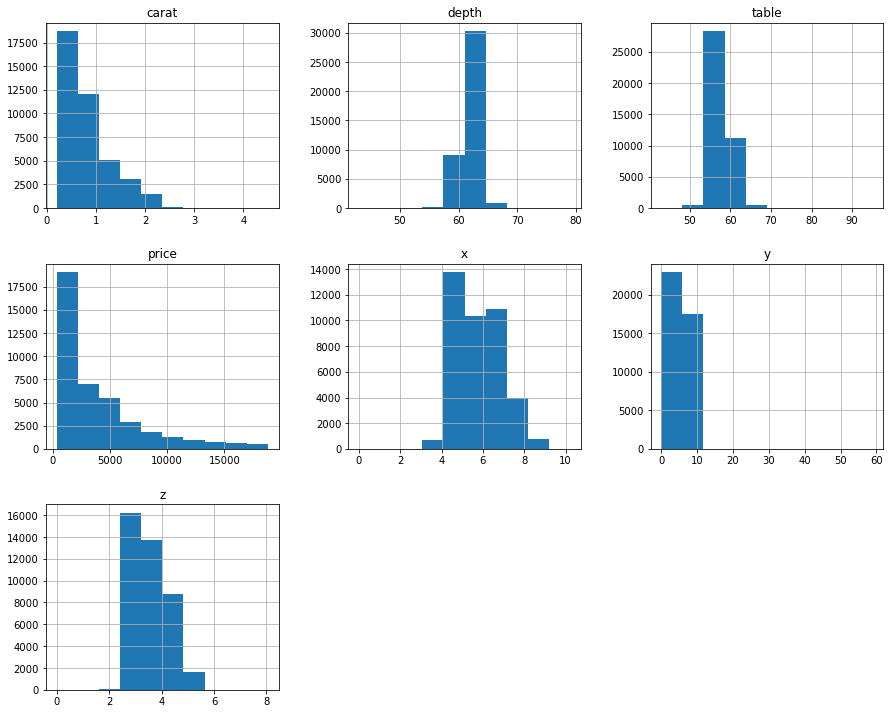

In [19]:
diamonds.hist(figsize=(15,30), layout=(7,3))
plt.show()

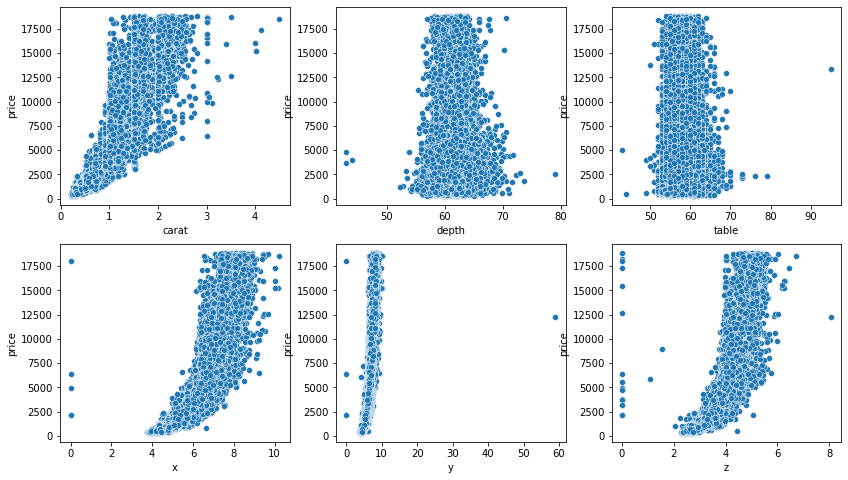

In [20]:
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(14,8))
sns.scatterplot(x=diamonds['carat'], y=diamonds['price'],ax=ax[0][0])
sns.scatterplot(x=diamonds['depth'], y=diamonds['price'],ax=ax[0][1])
sns.scatterplot(x=diamonds['table'], y=diamonds['price'],ax=ax[0][2])
sns.scatterplot(x=diamonds['x'], y=diamonds['price'],ax=ax[1][0])
sns.scatterplot(x=diamonds['y'], y=diamonds['price'],ax=ax[1][1])
sns.scatterplot(x=diamonds['z'], y=diamonds['price'],ax=ax[1][2])
plt.show()

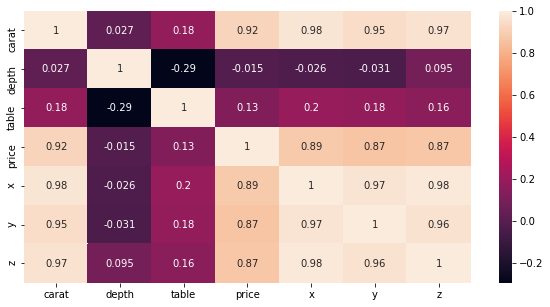

In [49]:
fig, ax = plt.subplots(figsize=(10,5))
correlation= diamonds.corr()
sns.heatmap(correlation, annot= True)
plt.show()

### Categorical variables

/Users/gonzaloalvarez/miniconda3/envs/ironhack_env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/gonzaloalvarez/miniconda3/envs/ironhack_env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/gonzaloalvarez/miniconda3/envs/ironhack_env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an exp

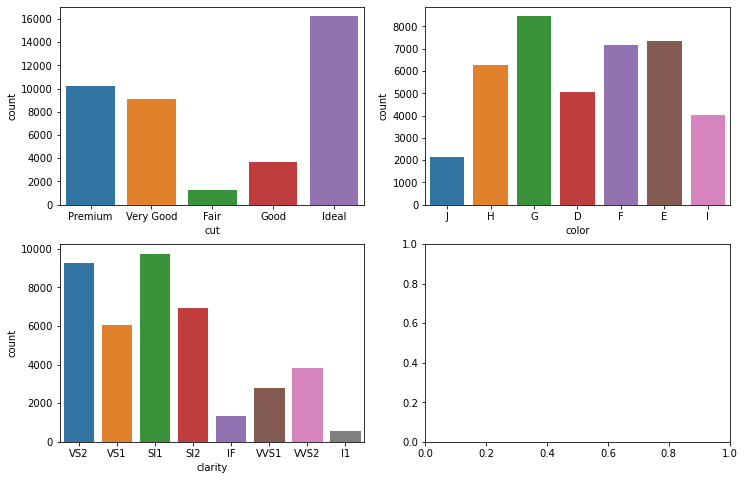

In [22]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(12,8))
sns.countplot(diamonds['cut'], ax=ax[0][0])
sns.countplot(diamonds['color'], ax=ax[0][1])
sns.countplot(diamonds['clarity'], ax=ax[1][0])
plt.show()

### Analyzing Relationships Between Numerical and Categorical Variables

In [23]:
categorical=['cut', 'color', 'clarity']

In [24]:
numerical=['carat', 'depth', 'table', 'price', 'x', 'y', 'z']
diamonds= diamonds[numerical+categorical]

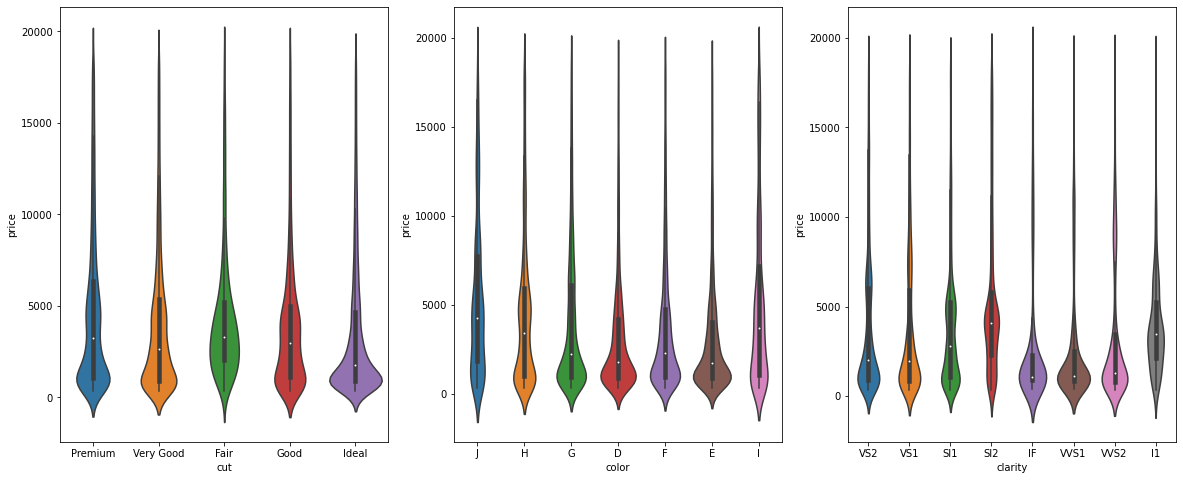

In [25]:
fig, ax= plt.subplots(1,3, figsize=(20,8))

for var, subplot in zip(categorical, ax.flatten()):
    sns.violinplot(x=var, y='price', data=diamonds, ax=subplot)
    
    
    
    

## Hypothesis testing

In [26]:
diamonds.head()

carat  depth  table  price     x     y     z        cut color clarity
0   1.21   62.4   58.0   4268  6.83  6.79  4.25    Premium     J     VS2
1   0.32   63.0   57.0    505  4.35  4.38  2.75  Very Good     H     VS2
2   0.71   65.5   55.0   2686  5.62  5.53  3.65       Fair     G     VS1
3   0.41   63.8   56.0    738  4.68  4.72  3.00       Good     D     SI1
4   1.02   60.5   59.0   4882  6.55  6.51  3.95      Ideal     G     SI1

### Test 1

In [27]:
from scipy.stats import ttest_1samp, ttest_ind

price=diamonds['price']

result=ttest_1samp(price, 4000)

print(result)
print(np.mean(price))

#We reject the null hypothesis. The average price is != 4000 and because of the t-statistic is negative, 
#the conclusion is that the average price of our dataset it´s less than the compared value. 
#Doing the average mean of the price we can asume that the conclusion makes sense.   

Ttest_1sampResult(statistic=-3.604902369125729, pvalue=0.00031264532833074845)
3928.444469163268


### Test 2

#### Sub-Test 1

In [28]:
diamonds.head()

carat  depth  table  price     x     y     z        cut color clarity
0   1.21   62.4   58.0   4268  6.83  6.79  4.25    Premium     J     VS2
1   0.32   63.0   57.0    505  4.35  4.38  2.75  Very Good     H     VS2
2   0.71   65.5   55.0   2686  5.62  5.53  3.65       Fair     G     VS1
3   0.41   63.8   56.0    738  4.68  4.72  3.00       Good     D     SI1
4   1.02   60.5   59.0   4882  6.55  6.51  3.95      Ideal     G     SI1

In [29]:
#Filter for first comparataion

filter_fair_cut=diamonds[diamonds['cut']=='Fair']
filter_color_g= filter_fair_cut[filter_fair_cut['color']=='G']


#Filter for second comparation

filter_fair2_cut=diamonds[diamonds['cut']=='Fair']
filter_color_i= filter_fair2_cut[filter_fair_cut['color']=='I']

#Independent test

ttest_ind(filter_color_g['price'],filter_color_i['price'], equal_var=False )


Ttest_indResult(statistic=0.03626636629279179, pvalue=0.9710929771417586)

In [30]:
print(filter_color_g['price'].mean())
print(filter_color_i['price'].mean())

4473.021367521367
4459.014184397163


In [31]:
print(filter_color_g.shape)
print(filter_color_i.shape)

(234, 10)
(141, 10)


##### Conclusion Sub-Test 1

We accept the null hypothesis. The values of the two samples are practically the same. The samples are small but no that small to reject the test.

#### Sub-Test 2

In [32]:
#Filter for first comparation

filter_good_cut= diamonds[diamonds['cut']=='Good']
filter_color_e= filter_good_cut[filter_good_cut['color']=='E']

#Filter for second comparation

filter_good2_cut= diamonds[diamonds['cut']=='Good']
filter_color_f= filter_good2_cut[filter_good2_cut['color']=='F']

ttest_ind(filter_color_e['price'], filter_color_f['price'], equal_var=False)

Ttest_indResult(statistic=-0.4406178833837438, pvalue=0.6595600994188809)

In [33]:
print(filter_color_e['price'].mean())
print(filter_color_f['price'].mean())




3399.88115942029
3477.504518072289


In [34]:
print(filter_color_e.shape)
print(filter_color_f.shape)

(690, 10)
(664, 10)


##### Conclusion Sub-Test 2

We accept the null hypothesis. The pvalue is less than the the first test but we can´t accept out hypothesis. 
There are 600-700 samples of each variables so it is not a sample problem. 

#### Sub-Test 3

In [35]:
#Filter for first comparation

filter_ideal_cut= diamonds[diamonds['cut']=='Ideal']
filter_color_d= filter_ideal_cut[filter_ideal_cut['color']=='D']

#Filter for second comparation

filter_ideal2_cut= diamonds[diamonds['cut']=='Ideal']
filter_color_e= filter_ideal2_cut[filter_ideal2_cut['color']=='E']

ttest_ind(filter_color_d['price'], filter_color_e['price'], equal_var=False)



Ttest_indResult(statistic=-0.5376051381964381, pvalue=0.590875060001048)

In [36]:
print(filter_color_d['price'].mean()) 
print(filter_color_e['price'].mean())

2579.709647495362
2624.818649297223


In [37]:
print(filter_color_d.shape)
print(filter_color_e.shape)

(2156, 10)
(2917, 10)


##### Conclusion Sub-Test 3

Another hypothesis we accept the null hypothesis. We have a big sample but the two means are very similar.

#### Sub-Test 4

In [38]:
#Filter for first comparation

filter_premium_cut= diamonds[diamonds['cut']=='Premium']
filter_color_d= filter_premium_cut[filter_premium_cut['color']=='D']

#Filter for second comparation

filter_premium2_cut= diamonds[diamonds['cut']=='Premium']
filter_color_e= filter_premium2_cut[filter_premium2_cut['color']=='E']

ttest_ind(filter_color_d['price'], filter_color_e['price'], equal_var=False)

Ttest_indResult(statistic=0.4238712765446736, pvalue=0.6716959865958436)

In [39]:
print(filter_color_d['price'].mean()) 
print(filter_color_e['price'].mean())

3638.838961038961
3578.0864553314123


In [40]:
print(filter_color_d.shape)
print(filter_color_e.shape)

(1155, 10)
(1735, 10)


##### Conclusion Sub-Test 4

We accept the null hypothesis. There is practically no diference between one or another.

#### Sub-test 5

In [41]:
filter_verygood_cut= diamonds[diamonds['cut']=='Very Good']
filter_color_i= filter_verygood_cut[filter_verygood_cut['color']=='I']

#Filter for second comparation

filter_verygood2_cut= diamonds[diamonds['cut']=='Very Good']
filter_color_j= filter_verygood2_cut[filter_verygood2_cut['color']=='J']

ttest_ind(filter_color_i['price'], filter_color_j['price'], equal_var=False)

Ttest_indResult(statistic=0.34857584108266776, pvalue=0.7274714598286438)

In [42]:
print(filter_color_i['price'].mean())
print(filter_color_j['price'].mean())

5292.506104328524
5207.161735700197


In [43]:
print(filter_color_i.shape)
print(filter_color_j.shape)

(901, 10)
(507, 10)


##### Conclusion Sub-Test 5

We accept once again the null hypothesis. There is no difference between both average prices with a big sample.

#### Sub-Test 6

In [44]:
#First filter

filter_d= diamonds[diamonds['color']=='D']

#Second filter

filter_e= diamonds[diamonds['color']=='E']

ttest_ind(filter_d['price'], filter_e['price'])


Ttest_indResult(statistic=0.7630611794666871, pvalue=0.44544145948793734)

In [45]:
print(filter_d['price'].mean())
print(filter_e['price'].mean())

3134.943157060804
3088.3425255972697


In [46]:
print(filter_d.shape)
print(filter_d.shape)

(5049, 10)
(5049, 10)


##### Conclusion Sub-Test 6 and Final Conclusion

Once again we can´t accept our hypothesis that there is a significant difference between the average of the two prices we are calculating. Probably this results are conditioned by the fact we are comparing the same cut with color which are close in the scale of quality. Altough, the color and the cut are important for the price of the diamond, other variables as the carat and the size of it, are more correlationated to the price itself.